In [42]:
import pandas as pd
dataset=pd.read_csv("Tatacoffee13_21.csv", parse_dates=['Date'], index_col='Date')

In [43]:
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [44]:
#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2019-02-04") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [45]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [46]:
dummyDate=dataset     #we need graph so dummy date

In [47]:
dummyDate.index=all_date

In [48]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

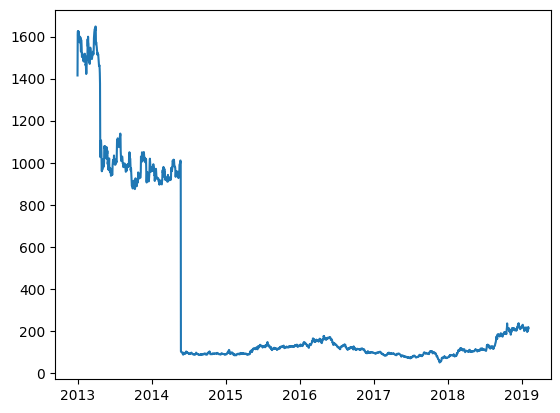

In [49]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

<Figure size 1600x500 with 0 Axes>

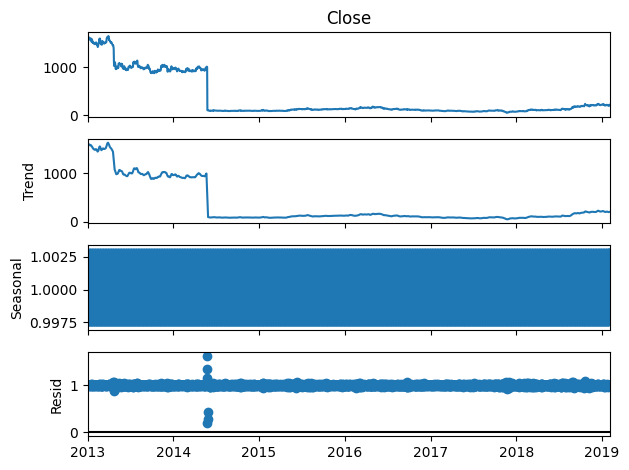

In [50]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

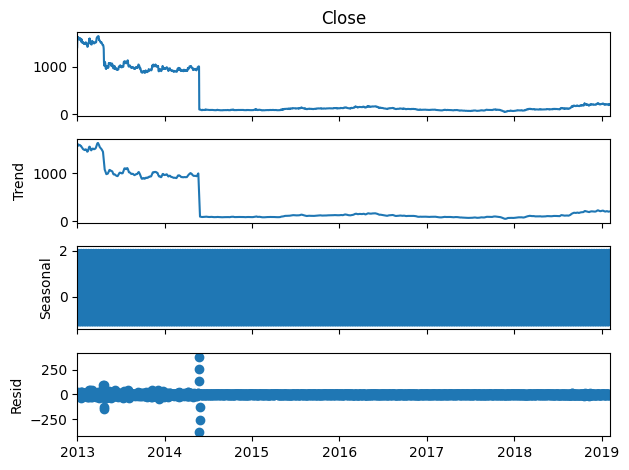

In [51]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [52]:

# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message
    
# Call the function and run the test



#### OPEN

Results of Dickey-Fuller Test:
Test Statistic                   -2.502734
p-value                           0.114810
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


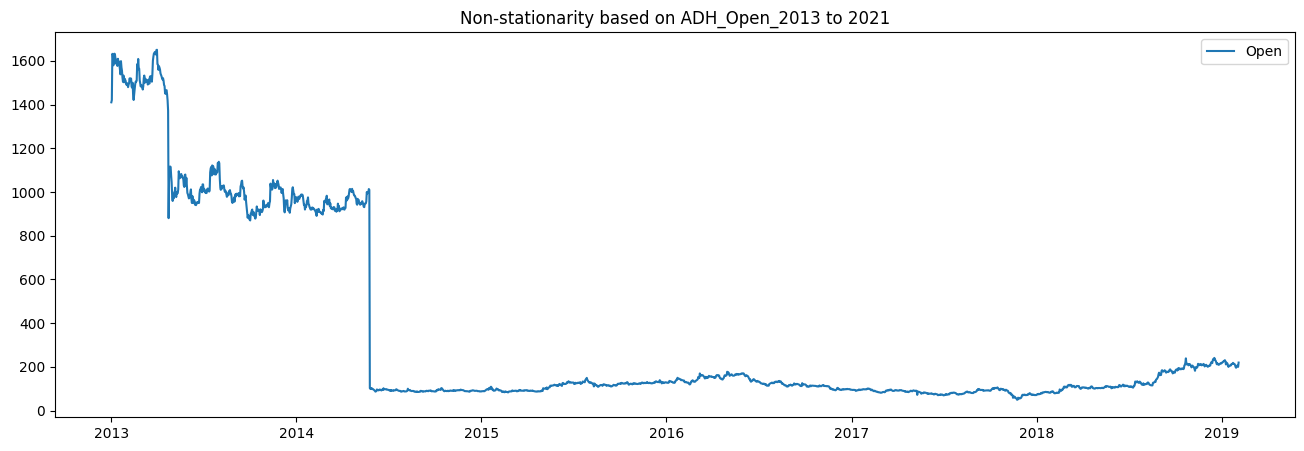

'Non-stationarity based on ADH'

In [53]:
adf_test(dataset["Open"],dataset,"Open")

In [54]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Open, maxlag = 1)
adf[0]

-2.502734388619978

In [55]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Open, maxlag = 1)
adf[1]

0.11481043527381063

In [56]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Open, maxlag = 1)
adf[2]

1

In [57]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Open, maxlag = 1)
adf[3]

2223

In [58]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Open, maxlag = 1)
adf[4]

{'1%': -3.433295059438173,
 '5%': -2.8628410403669844,
 '10%': -2.5674626062113077}

####
ADF statistic: -2.502
Critical values:
1% level: -3.433
5% level: -2.863
10% level: -2.567

the conclusion is that the price (dataset.Open) is not stationary at any of the specified significance levels (1%, 5%, or 10%).
This suggests that the time series may have a unit root and is non-stationary. 

#### CLOSE

Results of Dickey-Fuller Test:
Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Staionarity 


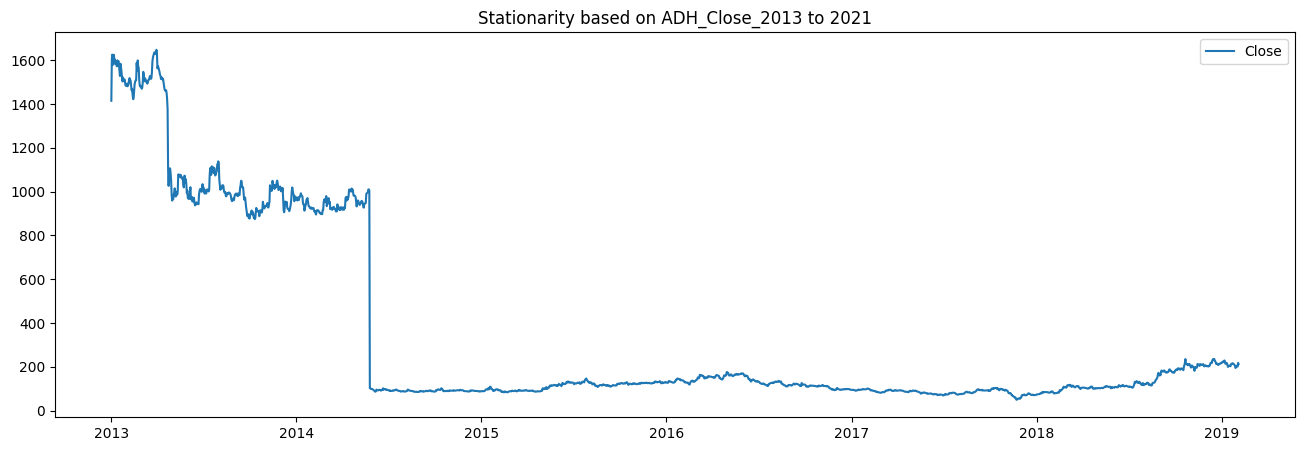

'Stationarity based on ADH'

In [59]:
adf_test(dataset["Close"],dataset,"Close")

In [60]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Close, maxlag = 1)
adf[0]

-3.007236327367315

In [61]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Close, maxlag = 1)
adf[1]

0.03422412229093029

In [62]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Close, maxlag = 1)
adf[2]

1

In [63]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Close, maxlag = 1)
adf[3]

2223

In [64]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(dataset.Close, maxlag = 1)
adf[4]

{'1%': -3.433295059438173,
 '5%': -2.8628410403669844,
 '10%': -2.5674626062113077}

####

ADF Test Results
ADF statistic: -3.007
Critical values:
1% level: -3.433
5% level: -2.863
10% level: -2.567

The ADF statistic (-3.007) is greater than the 10% critical value (-2.567), but less than the 5% critical value (-2.863).
This means that the null hypothesis of non-stationarity can be rejected at the 10% significance level, but not at the 5% or 1% significance levels.
In other words, the time series (dataset.Open) is stationary at the 10% significance level, but not stationary at the 5% or 1% significance levels.

Based on the updated ADF test results, the conclusion is that the price (dataset.Open) is stationary at the 10% significance level, but not stationary at the 
5% or 1% significance levels.

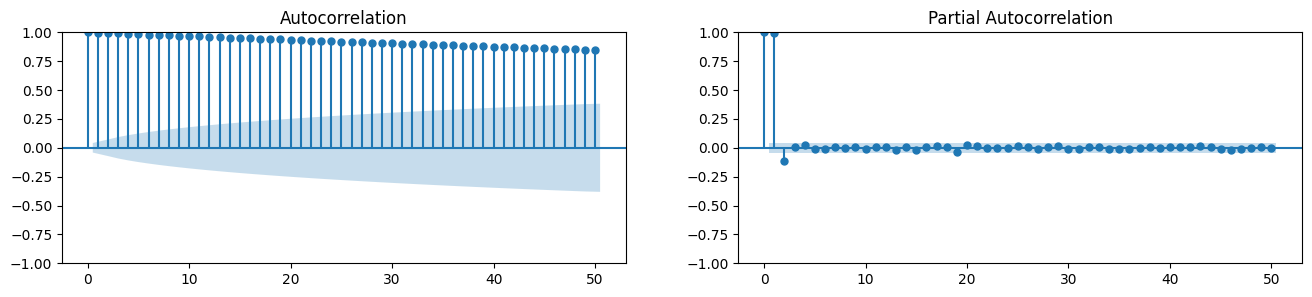

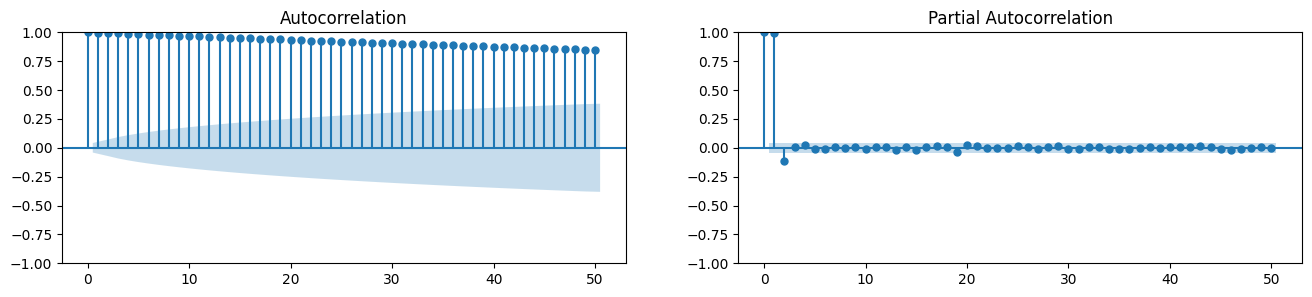

In [65]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

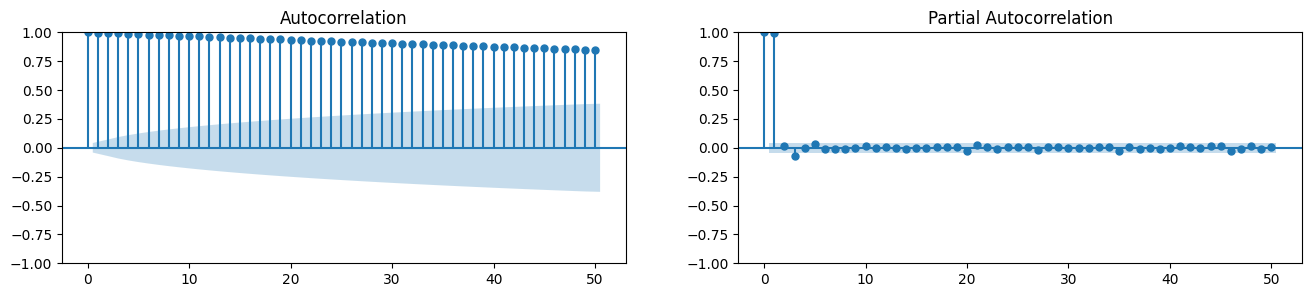

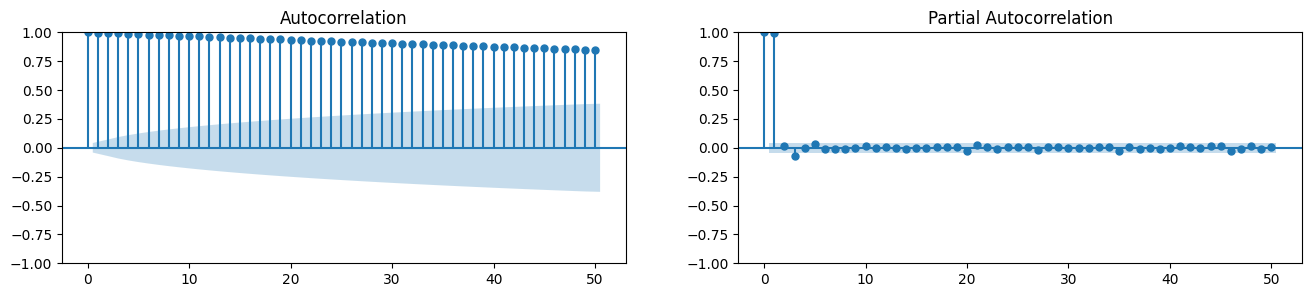

In [66]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.Open.tolist(), lags=50, ax=axes[0])   #xaxis-->lag  y-->correlation
plot_pacf(dataset.Open.tolist(), lags=50, ax=axes[1])

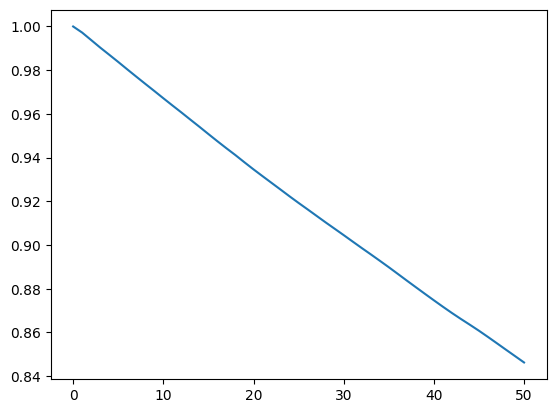

In [67]:
plt.plot(acf(dataset["Close"],nlags=50))

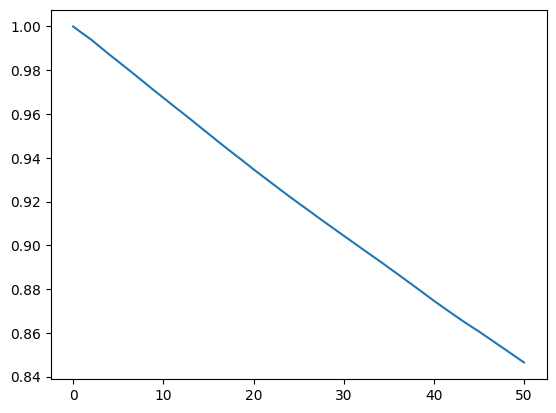

In [68]:
plt.plot(acf(dataset["Open"],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

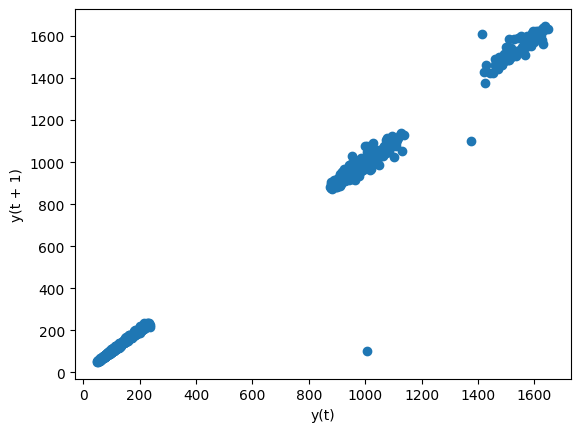

In [69]:
from pandas.plotting import lag_plot
lag_plot(dataset["Close"],lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

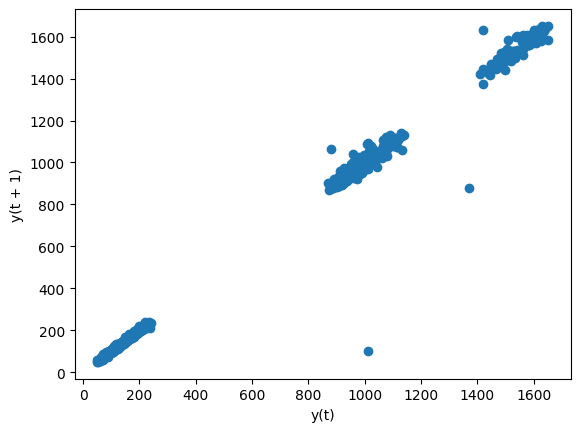

In [70]:
from pandas.plotting import lag_plot
lag_plot(dataset["Open"],lag=1)

In [71]:
#Approximate Entropy--> provides a way to quantify the regularity and unpredictability of time series data. 
#It has been applied in various fields to analyze the complexity of different types of signals and time series.


#Sample Entropy--> is a useful tool for quantifying the complexity and irregularity of time series data across various domains, 
#providing insights that can be applied in fields like medicine, biomechanics, and finance.


In [72]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [73]:
import numpy as np
print(ApEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18800\2578661817.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


0.027409184525792107


In [ ]:
#calculated ApEn value of 0.027 suggests that the "Close" column of the dataset has a relatively low complexity and high regularity. However, to draw stronger conclusions, it would be beneficial to compare this result to 
#other time series or use cases.

In [74]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [75]:
print(SampEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18800\1392444303.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


0.007918086989927514


In [ ]:
#the calculated SampEn value of 0.007918 indicates that the "Close" column of the dataset has a relatively low complexity and high regularity. Comparing this result to other time series or applications 
#would provide more context for the interpretation.